#  逻辑回归  logistic regression

逻辑回归解决二分类问题；将样本特征和样本发生概率联系起来，概率是一个数字；
- logistic 函数：
$$ g(z) = \frac{1}{1+e^{-z}} $$
- logistic 函数导数：
$$ g'(z) = g(z)(1-g(z))  $$

In [1]:
from pylab import *

In [2]:
x = np.linspace(-10,10,500)
y = 1/(1+np.exp(-x))

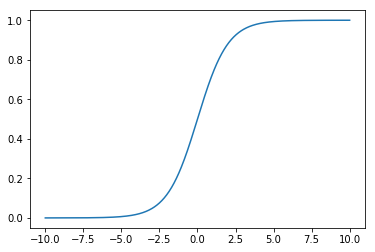

In [3]:
plt.plot(x,y)
plt.show()

逻辑回归的损失函数可以写为：
$$
cost=
\begin{cases}
-log(\hat{p}),   & \text { if y=1 } \\
-log(1-\hat{p}), & \text { if y=0 }
\end{cases}
$$  


因为该函数y的取值，最终公式可以化简为：
$$  cost=-ylog(\hat{p})-(1-y)log(1-\hat{p})  $$

如果有m个样本，则总的损失函数：
$$
J(\theta)=-\frac{1}{m}\sum_{i=1}^my^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})
$$
$$
\hat{p}^{(i)}=\sigma(X_b^{(i)}\theta)=\frac{1}{1+e^{-X_b^{(i)}\theta}}
$$


逻辑回归中使用正则化($ L_2 $指正则项$ L_2 $)：  
所求不再是$ J(\theta) $,而是 $ J(\theta)+\alpha L_2 $  
其中可以转化为求$ C \cdot J(\theta)+L_2 $  
$ C = \frac{1}{\alpha} $



In [4]:
from sklearn import datasets
iris = datasets.load_iris()

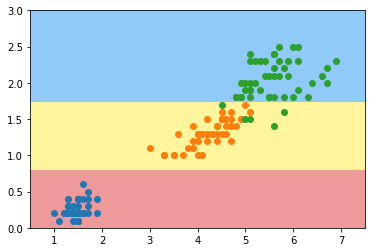

In [7]:
# %load ../pltboundary.py
"""
Created on Wed Jun 13 17:21:17 2018

@author: xhj
"""
from pylab import *
from sklearn import datasets

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
            np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
            np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
            )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap([ '#EF9A9A', '#FFF59D', '#90CAF9' ])
    plt.contourf(x0, x1, zz, linewidth=5, cmap = custom_cmap)
         

# 添加多项式项目  核函数， pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree,C=1.0,penalty='l2'):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))
    ])


if __name__ == '__main__':
    iris = datasets.load_iris()
    X = iris.data[:, 2:]
    y = iris.target
    from sklearn.tree import DecisionTreeClassifier

    dt_clf = DecisionTreeClassifier(max_depth=2, criterion = "entropy")
    dt_clf.fit(X,y)
    plot_decision_boundary(dt_clf, axis= [0.5, 7.5, 0,3])

    plt.scatter(X[y==0,0], X[y==0,1])
    plt.scatter(X[y==1,0], X[y==1,1])
    plt.scatter(X[y==2,0], X[y==2,1])
    plt.show()
                                  

In [8]:
X = iris.data
y = iris.target

In [9]:
X = X[y<2, :2]
y = y[y<2]

In [10]:
X.shape

(100, 2)

In [11]:
y.shape

(100,)

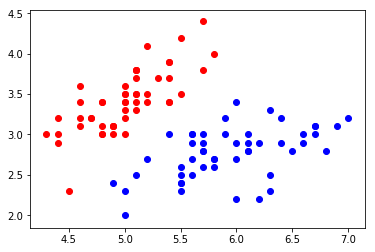

In [12]:
plt.scatter(X[y==0, 0],X[y==0,1], color='red')
plt.scatter(X[y==1, 0],X[y==1,1], color='blue')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

0.92000000000000004

In [15]:
print(log_reg.coef_, log_reg.intercept_)


[[ 1.98293359 -3.38535668]] [-0.4765253]


In [16]:
def f(x):
    return (-log_reg.coef_[0][0]*x -log_reg.intercept_)/log_reg.coef_[0][1]

In [17]:
x1 = np.linspace(4,8,100)
x2 = f(x1)

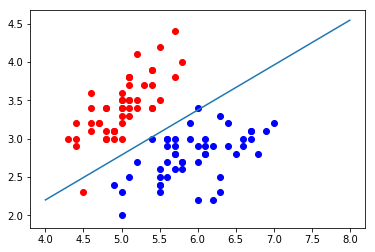

In [18]:
plt.scatter(X[y==0, 0],X[y==0,1], color='red')
plt.scatter(X[y==1, 0],X[y==1,1], color='blue')
plt.plot(x1,x2)
plt.show()

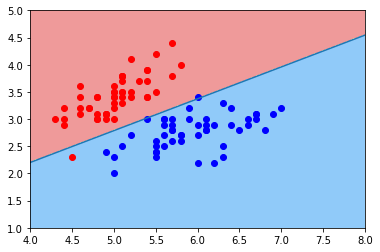

In [19]:
plot_decision_boundary(log_reg, axis=[4,8,1,5])
plt.scatter(X[y==0, 0],X[y==0,1], color='red')
plt.scatter(X[y==1, 0],X[y==1,1], color='blue')
plt.plot(x1,x2)
plt.show()

## KNN的决策边界

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
knn_clf.score(x_test, y_test)

1.0

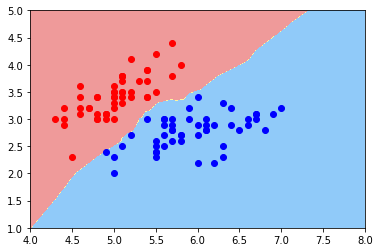

In [22]:
plot_decision_boundary(knn_clf, axis=[4,8,1,5])
plt.scatter(X[y==0, 0],X[y==0,1], color='red')
plt.scatter(X[y==1, 0],X[y==1,1], color='blue')
plt.show()

#  逻辑回归中多项式核函数的引入，产生不规则边界

In [23]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2+X[:,1]**2 < 1.5 , dtype='int')

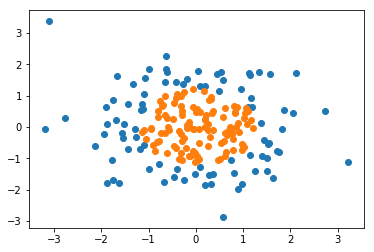

In [24]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
log_reg.score(X,y)

0.60499999999999998

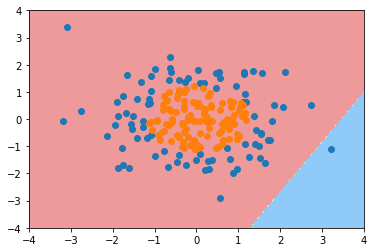

In [28]:
plot_decision_boundary(knn_clf, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [29]:
# 添加多项式项目  核函数， pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])


In [30]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [31]:
poly_log_reg.score(X,y)

0.94999999999999996

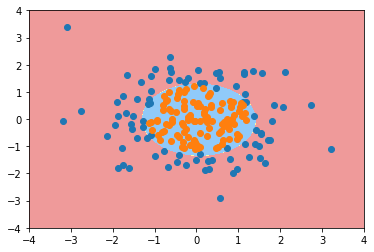

In [32]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 逻辑回归模型的正则化

逻辑回归中使用正则化：  
所求不再是$ J(\theta) $,而是 $ J(\theta)+\alpha L_2 $  
其中可以转化为求$ C \cdot J(\theta)+L_1 $  
$$ C = \frac{1}{\alpha} $$


In [33]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)]=1

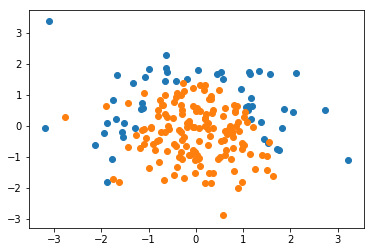

In [34]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=666)

In [36]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
log_reg.score(x_train, y_train)

0.79333333333333333

In [38]:
log_reg.score(x_test, y_test)

0.85999999999999999

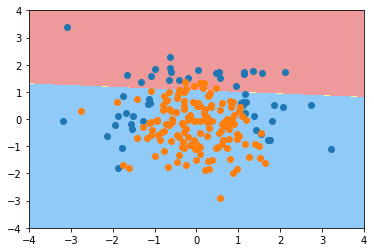

In [39]:
plot_decision_boundary(log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [40]:
poly_log_reg = PolynomialLogisticRegression(degree = 2)
poly_log_reg.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [41]:
poly_log_reg.score(x_train, y_train)

0.91333333333333333

In [42]:
poly_log_reg.score(x_test, y_test)

0.93999999999999995

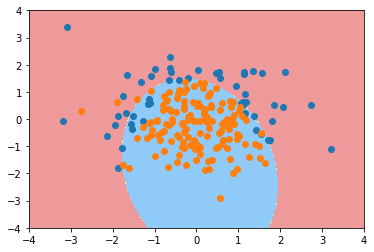

In [43]:
plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [44]:
poly_log_reg2 = PolynomialLogisticRegression(degree = 20)
poly_log_reg2.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [45]:
poly_log_reg2.score(x_train, y_train)

0.93999999999999995

In [46]:
poly_log_reg2.score(x_test, y_test)

0.92000000000000004

In [47]:

def PolynomialLogisticRegression(degree,C=1.0,penalty='l2'):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))
    ])


In [48]:
poly_log_reg2 = PolynomialLogisticRegression(degree = 20, C=0.1,penalty='l1')
poly_log_reg2.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [49]:
poly_log_reg2.score(x_train, y_train)

0.82666666666666666

In [50]:
poly_log_reg2.score(x_test, y_test)

0.90000000000000002

# 使用OvR和OvO解决多分类问题

LogisticRegression自带OvR和OvO，但是sklearn也提供了通用的OvR和OvO方法

In [51]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=666)

In [53]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
log_reg.score(x_test, y_test)

0.65789473684210531

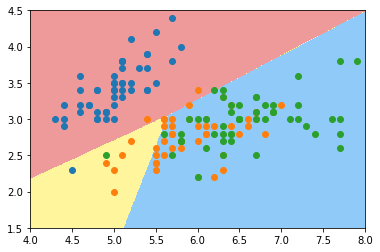

In [55]:
plot_decision_boundary(log_reg, axis=[4,8,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [56]:
poly_log_reg = PolynomialLogisticRegression(degree = 2)
poly_log_reg.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [57]:
poly_log_reg.score(x_test, y_test)

0.78947368421052633

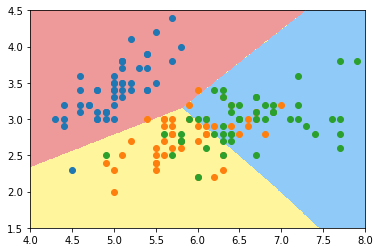

In [58]:
plot_decision_boundary(poly_log_reg, axis=[4,8,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [59]:
log_reg1 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
log_reg1.score(x_test, y_test)

0.78947368421052633

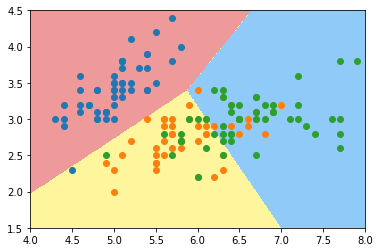

In [62]:
plot_decision_boundary(log_reg1, axis=[4,8,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [63]:
def PolynomialLogisticRegression(degree,C=1.0,penalty='l2'):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, multi_class='multinomial', solver='newton-cg'))
    ])

In [64]:
poly_log_reg1 = PolynomialLogisticRegression(degree = 2)
poly_log_reg1.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))])

In [65]:
poly_log_reg1.score(x_test, y_test)

0.81578947368421051

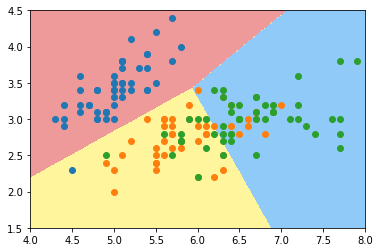

In [66]:
plot_decision_boundary(poly_log_reg1, axis=[4,8,1.5,4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

当使用所有的特征维度时，数据的分类结果

In [67]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=666)

In [69]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
log_reg.score(x_test, y_test)

0.94736842105263153

In [72]:
log_reg1 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
log_reg1.score(x_test, y_test)

1.0

OvO的分类结果要高于OvR，但是OvO训练时间要远远高于OvR，因为对于10个分类，OvO训练次数为$ C_{10}^{2} $,从10个类中选出任意2个。而OvR是$ 10 $,表示每次都是1个类比剩余的9个类。

sklearn提供了通用的OvO和OvR

In [75]:
# OvR
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(x_train, y_train)
ovr.score(x_test, y_test) #和上边LogisticRegression默认的OvR完全一样的score值

0.94736842105263153

In [78]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(x_train, y_train)
ovo.score(x_test, y_test) #和上边LogisticRegression默认的OvO完全一样的score值

1.0